# Task 2

### Data cleaning
### Не забудьте проверять какие data types у вас колонны. В конце колонны Rating, Size, Installs, Price должны быть числовые

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date, datetime, time, timezone

In [3]:
#read 5 first rows of csv
df = pd.read_csv(r'C:\Users\Kevin\Downloads\Telegram Desktop\googleplay.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#print information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#check for null values in each collumn
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
#check for null values for all dataframe
df.isnull().sum().sum()

1487

In [7]:
#print size of the dataframe and count values
print(df.shape)
print(df.nunique())

(10841, 13)
App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64


### Below will be given an example how to replace values and to convert string to numeric data

In [8]:
df.Size=df.Size.replace('Varies with device', np.nan)
#numpy is used as np to replace 'Varies with device' to Nan value 
df.Size=df.Size.replace('1,000+', 1000)
df.Size=df.Size.str.replace('k','e+3')

In [9]:
#replace strings 'M' to 'e+6' as it was given for 'k'
df.Size=df.Size.str.replace('M', 'e+6')
#uncomment line below to convert Size column to numeric
df.Size=pd.to_numeric(df.Size)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            9145 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


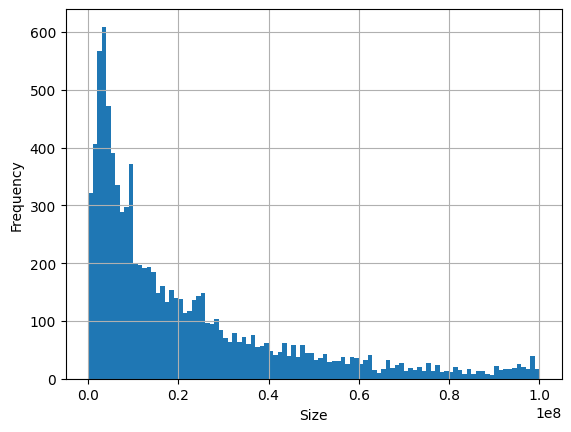

In [11]:
#make a histogram x - Size, y - Frequency
df.Size.plot.hist(bins=100)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.grid('True')

In [12]:
#after replacing strings to Nan values in Size calculate nan values in Size
df['Size'].isnull().sum()
#should be 1695

1696

In [13]:
#replace nan values in Size to the average(mean) value
df.Size=df.Size.replace('nan', df.Size.mean())


In [14]:
#check unique values in Installs column
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

### As you can notice we have string data type in Installs column due to '+' and ',' signs after the numbers

In [15]:
#delete all + in each  values in Installs
#replace commas to nothing: "," to ""
#replace Free to Nan value
df.Installs = pd.to_numeric(df['Installs'].str.replace('[+,]', '', regex=True).replace('Free', np.nan))
df.Installs.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype  
--------------  -----  
10840 non-null  float64
dtypes: float64(1)
memory usage: 84.8 KB


In [16]:
#check notnull values in Installs
df.Installs.notnull()

0        True
1        True
2        True
3        True
4        True
         ... 
10836    True
10837    True
10838    True
10839    True
10840    True
Name: Installs, Length: 10841, dtype: bool

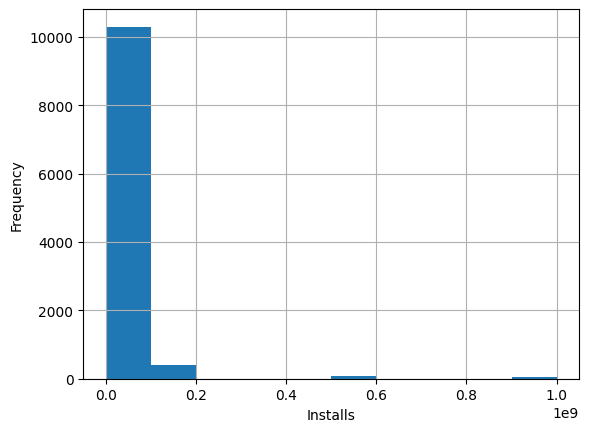

In [17]:
#convert Installs to numeric (example was for Size)
#make histogramm of number of installs to frequency
df.Installs.plot.hist()
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.grid('True')

In [18]:
#print row with NaN value in Installs column
df[df.Installs.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,NaN,NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [19]:
#delete the row with Nan value in Installs columnn and try to print Nan value in Installs again
df = df.dropna(axis = 0, how = 'any', subset = ['Installs'])
df[df['Installs'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [20]:
#check null values in Rating column

df.Rating.isnull().sum()

1474

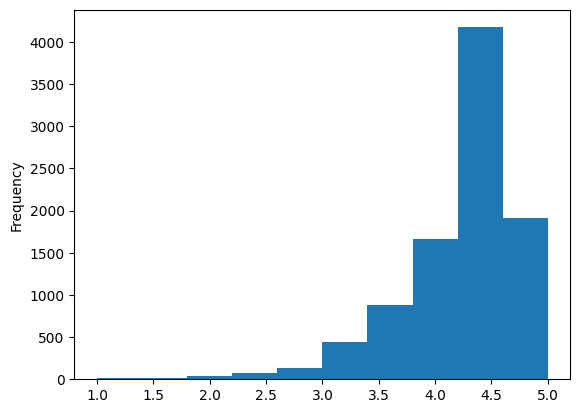

In [21]:
#make histogramm of Rating to Frequency
df.Rating.plot.hist()
plt.xlabel = 'Rating'
plt.ylabel = 'Frequency'




In [22]:
#calculate the median value of Rating column
median_rating = df.Rating.median()
#replace Nan values in Rating to the median
df['Rating'].fillna(median_rating, inplace=True)
#print null values of Rating column after replacing missing values
df['Rating'].isnull().sum()

#should be 0 missing values in rating column


0

In [24]:
# #print only those apps which cost more than 350 dollars
# price_m = pd.to_numeric(df['Price'], errors='coerce')
# price_m = df[df['Price']>350]
# price_m[['App','Price']]


# #should be 16 apps overall

In [25]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<Axes: >

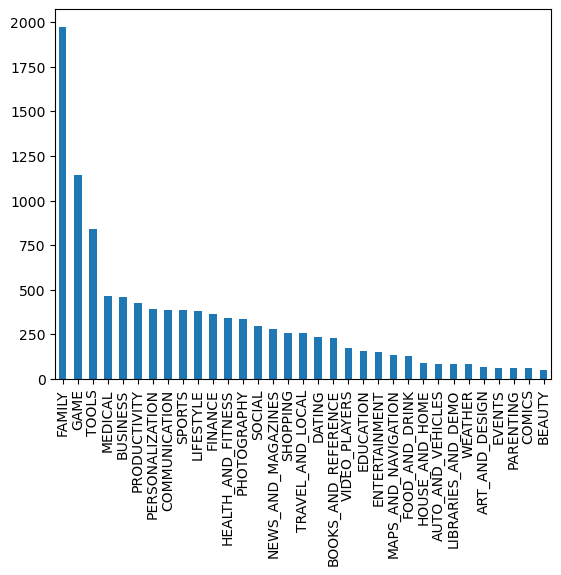

In [ ]:
#make a barplot for unique categories in Category column
category_counts = df.Category.value_counts()
category_counts.plot(kind='bar')


In [ ]:
#check for null values in each collumn
category_counts.isnull()
#should be null values in Type, Current Ver and Android ver

FAMILY                 False
GAME                   False
TOOLS                  False
MEDICAL                False
BUSINESS               False
PRODUCTIVITY           False
PERSONALIZATION        False
COMMUNICATION          False
SPORTS                 False
LIFESTYLE              False
FINANCE                False
HEALTH_AND_FITNESS     False
PHOTOGRAPHY            False
SOCIAL                 False
NEWS_AND_MAGAZINES     False
SHOPPING               False
TRAVEL_AND_LOCAL       False
DATING                 False
BOOKS_AND_REFERENCE    False
VIDEO_PLAYERS          False
EDUCATION              False
ENTERTAINMENT          False
MAPS_AND_NAVIGATION    False
FOOD_AND_DRINK         False
HOUSE_AND_HOME         False
AUTO_AND_VEHICLES      False
LIBRARIES_AND_DEMO     False
WEATHER                False
ART_AND_DESIGN         False
EVENTS                 False
PARENTING              False
COMICS                 False
BEAUTY                 False
Name: Category, dtype: bool

In [ ]:
#replace missing values in columns Type, Current Ver, Android Ver to the most frequent word in the column

In [ ]:
#recheck missing values in columns
#should be 0 missing values for all dataframe

In [ ]:
#make a boxplot for Rating column
plt.figure(figsize=(8, 6))
category_counts.boxplot(column='Rating')

AttributeError: 'Series' object has no attribute 'boxplot'

<Figure size 800x600 with 0 Axes>

In [ ]:
#calculate mean, standard deviation, variance, coefficient of variation for Rating column

### Before starting a pairplot check with info that all 4 columns are float data type

In [ ]:
#make a pairplot using seaborn for 4 columns Rating, Size, Installs, Price

### The end